This can be run [run on Google Colab using this link](https://colab.research.google.com/github/CS7150/CS7150-Homework_3/blob/main/HW3.1-Classifiers.ipynb)

## MNIST Classifiers (Convolutional Neural Networks and Fully Connected Networks)

<b>Optional</b>: Installing Wandb to see cool analysis of you code. You can go through the documentation here. We will do it for this assignment to get a taste of the GPU and CPU utilizations. If this is creating problems to your code, please comment out all the wandb lines from the notebook

In [1]:
# Uncomment the below line to install wandb (optinal)
!pip install wandb
# Uncomment the below line to install torchinfo (https://github.com/TylerYep/torchinfo) [Mandatory]
!pip install torchinfo

In [2]:
%%bash

wget -N https://cs7150.baulab.info/2022-Fall/data/mnist-classify.pth

--2023-10-11 16:51:09--  https://cs7150.baulab.info/2022-Fall/data/mnist-classify.pth
Resolving cs7150.baulab.info (cs7150.baulab.info)... 35.232.255.106
Connecting to cs7150.baulab.info (cs7150.baulab.info)|35.232.255.106|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘mnist-classify.pth’ not modified on server. Omitting download.



In [3]:
# Importing libraries
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader,random_split,Subset
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torchinfo import summary
import numpy as np
import datetime

from typing import List
from collections import OrderedDict
import math

In [4]:
# Create an account at https://wandb.ai/site and paste the api key here (optional)
import wandb
wandb.init(project="hw3.1-ConvNets")

wandb: Currently logged in as: bellwood22 (bellwood2). Use `wandb login --relogin` to force relogin


### Some helper functions to view network parameters

In [5]:
def view_network_parameters(model):
    # Visualise the number of parameters
    tensor_list = list(model.state_dict().items())
    total_parameters = 0
    print('Model Summary\n')
    for layer_tensor_name, tensor in tensor_list:
        total_parameters += int(torch.numel(tensor))
        print('{}: {} elements'.format(layer_tensor_name, torch.numel(tensor)))
    print(f'\nTotal Trainable Parameters: {total_parameters}!')

In [6]:
def view_network_shapes(model, input_shape):
    print(summary(conv_net, input_size=input_shape))

### Fully Connected Network for Image Classification
Let's build a simple fully connected network!

In [7]:
def simple_fc_net():
    model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(1*28*28,8*28*28),
        nn.ReLU(),
        nn.Linear(8*28*28,16*14*14),
        nn.ReLU(),
        nn.Linear(16*14*14,32*7*7),
        nn.ReLU(),
        nn.Linear(32*7*7,288),
        nn.ReLU(),
        nn.Linear(288,64),
        nn.ReLU(),
        nn.Linear(64,10),
        nn.LogSoftmax())
    return model

In [8]:
fc_net = simple_fc_net()

In [9]:
view_network_parameters(fc_net)

Model Summary

1.weight: 4917248 elements
1.bias: 6272 elements
3.weight: 19668992 elements
3.bias: 3136 elements
5.weight: 4917248 elements
5.bias: 1568 elements
7.weight: 451584 elements
7.bias: 288 elements
9.weight: 18432 elements
9.bias: 64 elements
11.weight: 640 elements
11.bias: 10 elements

Total Trainable Parameters: 29985482!


In [10]:
view_network_parameters(fc_net)

Model Summary

1.weight: 4917248 elements
1.bias: 6272 elements
3.weight: 19668992 elements
3.bias: 3136 elements
5.weight: 4917248 elements
5.bias: 1568 elements
7.weight: 451584 elements
7.bias: 288 elements
9.weight: 18432 elements
9.bias: 64 elements
11.weight: 640 elements
11.bias: 10 elements

Total Trainable Parameters: 29985482!


In [11]:
from torchinfo import summary
summary(fc_net, input_size=(1, 1, 28,28))

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 10]                   --
├─Flatten: 1-1                           [1, 784]                  --
├─Linear: 1-2                            [1, 6272]                 4,923,520
├─ReLU: 1-3                              [1, 6272]                 --
├─Linear: 1-4                            [1, 3136]                 19,672,128
├─ReLU: 1-5                              [1, 3136]                 --
├─Linear: 1-6                            [1, 1568]                 4,918,816
├─ReLU: 1-7                              [1, 1568]                 --
├─Linear: 1-8                            [1, 288]                  451,872
├─ReLU: 1-9                              [1, 288]                  --
├─Linear: 1-10                           [1, 64]                   18,496
├─ReLU: 1-11                             [1, 64]                   --
├─Linear: 1-12                           [1, 10]      

<b>Exercise</b>: Now try to add different layers and see how the network parameters vary. Does adding layers reduce the parameters? Does the number of hidden neurons in the layers affect the total trainable parameters?

<i>Add a few sentences on your observations while using various architectures</i>

In [12]:
#Please type your answer here ...
"""
Increasing the number of layers lead to increase the number of neurons. Therefore, the number of parameters increases.
"""
def changed_fc_net():
    model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(1*28*28,8*28*28),
        nn.ReLU(),
        nn.Linear(8*28*28,4*28*28),
        nn.ReLU(),
        nn.Linear(4*28*28,16*14*14),
        nn.ReLU(),
        nn.Linear(16*14*14,32*7*7),
        nn.ReLU(),
        nn.Linear(32*7*7,288),
        nn.ReLU(),
        nn.Linear(288,144),
        nn.ReLU(),
        nn.Linear(144,64),
        nn.ReLU(),
        nn.Linear(64,10),
        nn.LogSoftmax())
    return model

In [13]:
fc_net = changed_fc_net()

In [14]:
view_network_parameters(fc_net)

Model Summary

1.weight: 4917248 elements
1.bias: 6272 elements
3.weight: 19668992 elements
3.bias: 3136 elements
5.weight: 9834496 elements
5.bias: 3136 elements
7.weight: 4917248 elements
7.bias: 1568 elements
9.weight: 451584 elements
9.bias: 288 elements
11.weight: 41472 elements
11.bias: 144 elements
13.weight: 9216 elements
13.bias: 64 elements
15.weight: 640 elements
15.bias: 10 elements

Total Trainable Parameters: 39855514!


In [15]:
from torchinfo import summary
summary(fc_net, input_size=(1, 1, 28,28))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 10]                   --
├─Flatten: 1-1                           [1, 784]                  --
├─Linear: 1-2                            [1, 6272]                 4,923,520
├─ReLU: 1-3                              [1, 6272]                 --
├─Linear: 1-4                            [1, 3136]                 19,672,128
├─ReLU: 1-5                              [1, 3136]                 --
├─Linear: 1-6                            [1, 3136]                 9,837,632
├─ReLU: 1-7                              [1, 3136]                 --
├─Linear: 1-8                            [1, 1568]                 4,918,816
├─ReLU: 1-9                              [1, 1568]                 --
├─Linear: 1-10                           [1, 288]                  451,872
├─ReLU: 1-11                             [1, 288]                  --
├─Linear: 1-12                           [1, 144]  

### Convolutional Neural Network for Image Classification
Let's build a simple CNN to classify our images.
<b> Exercise 3.1.1:</b> In the function below please add the conv/Relu/Maxpool layers to match the shape of FC-Net. Suppose at the some layer the FC-Net has `28*28*16` dimension, we want your conv_net to have `16 X 28 X 28` shape at the same numbered layer. <br>
<b>Extra-credit:</b> Try not to use MaxPool2d !

In [17]:
def simple_conv_net():
    model = nn.Sequential(
        nn.Conv2d(1,16,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
        # TO-DO: Add layers below
        # 3 (16x14x14)
        nn.Conv2d(16,32,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
        # 4 (32x7x7)
        nn.Conv2d(32,32,kernel_size=1,padding=2,stride=2),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
        # TO-DO, what will your shape be after you flatten? Fill it in place of None
        nn.Flatten(),
        nn.Linear(288,64),
        # Do not change the code below
        nn.ReLU(),
        nn.Linear(64,10),
        nn.LogSoftmax())
    return model

In [18]:
conv_net = simple_conv_net()

In [19]:
view_network_parameters(conv_net)

Model Summary

0.weight: 144 elements
0.bias: 16 elements
3.weight: 4608 elements
3.bias: 32 elements
6.weight: 1024 elements
6.bias: 32 elements
10.weight: 18432 elements
10.bias: 64 elements
12.weight: 640 elements
12.bias: 10 elements

Total Trainable Parameters: 25002!


In [20]:
view_network_shapes(conv_net, input_shape=(1,1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 10]                   --
├─Conv2d: 1-1                            [1, 16, 28, 28]           160
├─ReLU: 1-2                              [1, 16, 28, 28]           --
├─MaxPool2d: 1-3                         [1, 16, 14, 14]           --
├─Conv2d: 1-4                            [1, 32, 14, 14]           4,640
├─ReLU: 1-5                              [1, 32, 14, 14]           --
├─MaxPool2d: 1-6                         [1, 32, 7, 7]             --
├─Conv2d: 1-7                            [1, 32, 6, 6]             1,056
├─ReLU: 1-8                              [1, 32, 6, 6]             --
├─MaxPool2d: 1-9                         [1, 32, 3, 3]             --
├─Flatten: 1-10                          [1, 288]                  --
├─Linear: 1-11                           [1, 64]                   18,496
├─ReLU: 1-12                             [1, 64]                   --
├─Li

<b>Exercise 3.1.2</b>: Why is the final layer a log softmax? What is a softmax function? Can we use ReLU instead of softmax? If yes, what would you do different? If not, tell us why. If you think there is a different answer, feel free to use this space to chart it down

Softmax is used for multiple classification of targets in the MNIST dataset, and it is necessary to use softmax for classification. This is because if we use ReLU, all negative values are returned as 0 and have no probabilistic meaning.

<b>Exercise 3.1.3</b>: What is the ratio of number of parameters of Conv-net to number of parameters of FC-Net <br>
$\frac{p_{conv-net}}{p_{fc-net}}$ = 74154/29985482 <br>
Do you see the difference ?!  [Despite using the same number of layers, FC-NET has a much larger number of parameters.]

<b>Exercise 3.1.4</b>: Now try to add different layers and see how the network parameters vary. Does adding layers reduce the parameters? Does the number of hidden neurons in the layers affect the total trainable parameters? Use the `build_custom_fc_net` function given below. You do not have to understand the working of it.

<i>Add a few sentences on your observations while using various architectures</i>

In [21]:
def build_custom_fc_net(inp_dim: int, out_dim: int, hidden_fc_dim: List[int]):
    '''
    Inputs :

    inp_dim: Shape of the input dimensions (in MNIST case 28*28)
    out_dim: Desired classification classes (in MNIST case 10)
    hidden_fc_dim: List of the intermediate dimension shapes (list of integers). Try different values and see the shapes'

    Return: nn.Sequential (final custom model)
    '''
    assert type(hidden_fc_dim) == list, "Please define hidden_fc_dim as list of integers"
    layers = []
    layers.append((f'flatten', nn.Flatten()))
    # If no hidden layer is required
    if len(hidden_fc_dim) == 0:
        layers.append((f'linear',nn.Linear(math.prod(inp_dim),out_dim)))
        layers.append((f'activation',nn.LogSoftmax()))
    else:
        # Loop over hidden dimensions and add layers
        for idx, dim in enumerate(hidden_fc_dim):
            if idx == 0:
                layers.append((f'linear_{idx+1}',nn.Linear(math.prod(inp_dim),dim)))
                layers.append((f'activation_{idx+1}',nn.ReLU()))
            else:
                layers.append((f'linear_{idx+1}',nn.Linear(hidden_fc_dim[idx-1],dim)))
                layers.append((f'activation_{idx+1}',nn.ReLU()))
        layers.append((f'linear_{idx+2}',nn.Linear(dim,out_dim)))
        layers.append((f'activation_{idx+2}',nn.LogSoftmax()))

    model =  nn.Sequential(OrderedDict(layers))
    return model

# TO-DO build different networks (atleast 3) and see the parameters
#(You don't have to understand the function above. It is a generic way to build a FC-Net)


fc_net_custom1 = build_custom_fc_net(inp_dim=(1,28,28), out_dim=10, hidden_fc_dim=[128,64,32])
view_network_parameters(fc_net_custom1)

# fc_net_custom2
fc_net_custom2 = build_custom_fc_net(inp_dim=(1, 28, 28), out_dim=10, hidden_fc_dim=[256, 128, 64])
view_network_parameters(fc_net_custom2)
# view_network_parameters(fc_net_custom2)

# fc_net_custom3
fc_net_custom3 = build_custom_fc_net(inp_dim=(1, 28, 28), out_dim=10, hidden_fc_dim=[64, 64, 64])
view_network_parameters(fc_net_custom3)
# view_network_parameters(fc_net_custom3)

Model Summary

linear_1.weight: 100352 elements
linear_1.bias: 128 elements
linear_2.weight: 8192 elements
linear_2.bias: 64 elements
linear_3.weight: 2048 elements
linear_3.bias: 32 elements
linear_4.weight: 320 elements
linear_4.bias: 10 elements

Total Trainable Parameters: 111146!
Model Summary

linear_1.weight: 200704 elements
linear_1.bias: 256 elements
linear_2.weight: 32768 elements
linear_2.bias: 128 elements
linear_3.weight: 8192 elements
linear_3.bias: 64 elements
linear_4.weight: 640 elements
linear_4.bias: 10 elements

Total Trainable Parameters: 242762!
Model Summary

linear_1.weight: 50176 elements
linear_1.bias: 64 elements
linear_2.weight: 4096 elements
linear_2.bias: 64 elements
linear_3.weight: 4096 elements
linear_3.bias: 64 elements
linear_4.weight: 640 elements
linear_4.bias: 10 elements

Total Trainable Parameters: 59210!


## Let's train the models to see their performace

In [22]:
# downloading mnist into folder
data_dir = 'data' # make sure that this folder is created in your working dir
# transform the PIL images to tensor using torchvision.transform.toTensor method
train_data = torchvision.datasets.MNIST(data_dir, train=True, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
test_data  = torchvision.datasets.MNIST(data_dir, train=False, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
print(f'Datatype of the dataset object: {type(train_data)}')
# check the length of dataset
n_train_samples = len(train_data)
print(f'Number of samples in training data: {len(train_data)}')
print(f'Number of samples in test data: {len(test_data)}')
# Check the format of dataset
#print(f'Foramt of the dataset: \n {train_data}')

val_split = .2
batch_size=256

train_data_, val_data = random_split(train_data, [int(n_train_samples*(1-val_split)), int(n_train_samples*val_split)])

train_loader = torch.utils.data.DataLoader(train_data_, batch_size=batch_size,shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,shuffle=True)

Datatype of the dataset object: <class 'torchvision.datasets.mnist.MNIST'>
Number of samples in training data: 60000
Number of samples in test data: 10000


### Displaying the loaded dataset

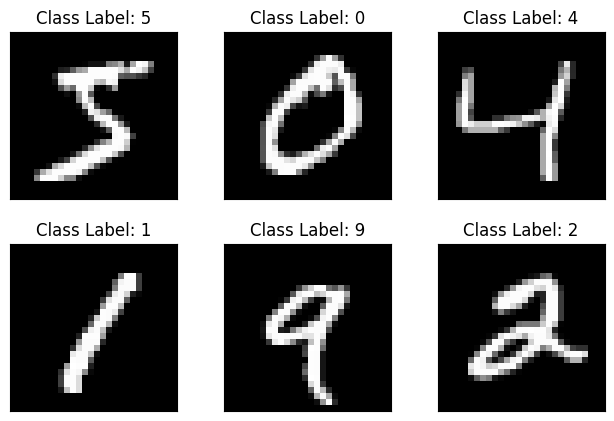

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.tight_layout()
  plt.imshow(train_data[i][0][0], cmap='gray', interpolation='none')
  plt.title("Class Label: {}".format(train_data[i][1]))
  plt.xticks([])
  plt.yticks([])

## Function to train the model

In [24]:
def train_model(model, train_loader, device, loss_fn, optimizer, input_dim=(-1,1,28,28)):
    model.train()
    # Initiate a loss monitor
    train_loss = []
    # Iterate the dataloader (we do not need the label values, this is unsupervised learning and not supervised classification)
    for images, labels in train_loader: # the variable `labels` will be used for customised training
        # reshape input
        images = torch.reshape(images,input_dim)
        images = images.to(device)
        labels = labels.to(device)
        # predict the class
        predicted = model(images)
        loss = loss_fn(predicted, labels)
        # Backward pass (back propagation)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        wandb.log({"Training Loss": loss})
        wandb.watch(model)
        train_loss.append(loss.detach().cpu().numpy())
    return np.mean(train_loss)

## Function to test the model

In [25]:
# Testing Function
def test_model(model, test_loader, device, loss_fn, input_dim=(-1,1,28,28)):
    # Set evaluation mode for encoder and decoder
    model.eval()
    with torch.no_grad(): # No need to track the gradients
        # Define the lists to store the outputs for each batch
        predicted = []
        actual = []
        for images, labels in test_loader:
            # reshape input
            images = torch.reshape(images,input_dim)
            images = images.to(device)
            labels = labels.to(device)
            ## predict the label
            pred = model(images)
            # Append the network output and the original image to the lists
            predicted.append(pred.cpu())
            actual.append(labels.cpu())
        # Create a single tensor with all the values in the lists
        predicted = torch.cat(predicted)
        actual = torch.cat(actual)
        # Evaluate global loss
        val_loss = loss_fn(predicted, actual)
    return val_loss.data

Before we start training let's delete the huge FC-Net we built and build a reasonable FC-Net (You learnt why such larger networks are not reasonable in the previous notebook)

In [26]:
del fc_net, fc_net_custom1, fc_net_custom2, fc_net_custom3
torch.cuda.empty_cache()
# Building a reasonable fully connected network
fc_net = build_custom_fc_net(inp_dim=(1,28,28), out_dim=10, hidden_fc_dim=[128,64,32])

<b>Exercise 3.1.5:</b>
Code the `weight_init_xavier` function by referring to https://pytorch.org/docs/stable/nn.init.html. Replace the weight initializations to your own function.


In [27]:
### Set the random seed for reproducible results
torch.manual_seed(0)
# Choosing a device based on the env and torch setup
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

def weight_init_zero(m):
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
        torch.nn.init.constant_(m.weight, 0.0)
        m.bias.data.fill_(0.01)

def weight_init_xavier(m):
  if isinstance(m,nn.Linear) or isinstance(m,nn.Conv2d):
    torch.nn.init.xavier_uniform_(m.weight)
    m.bias.data.fill_(0.01)

fc_net.to(device)
conv_net.to(device)

# Apply the weight initialization
fc_net.apply(weight_init_zero)
conv_net.apply(weight_init_zero)

# Apply the xavier weight initialization
#TO-DO: Add your function here
fc_net.apply(weight_init_xavier)
conv_net.apply(weight_init_xavier)

# Take the parameters for optimiser
params_to_optimize_fc = [
    {'params': fc_net.parameters()}
]

params_to_optimize_conv = [
    {'params': conv_net.parameters()}
]
### Define the loss function
loss_fn = torch.nn.NLLLoss()
### Define an optimizer (both for the encoder and the decoder!)
lr= 0.001

optim_fc = torch.optim.Adam(params_to_optimize_fc, lr=lr, weight_decay=1e-05)
optim_conv = torch.optim.Adam(params_to_optimize_conv, lr=lr, weight_decay=1e-05)
num_epochs = 30
wandb.config = {
  "learning_rate": lr,
  "epochs": num_epochs,
  "batch_size": batch_size
}

Selected device: cpu


# Training the Convolutional Neural Networks

In [31]:
print('Conv Net training started')
history_conv = {'train_loss':[],'val_loss':[]}
start_time = datetime.datetime.now()

for epoch in range(num_epochs):
    ### Training
    train_loss = train_model(
        model=conv_net,
        train_loader=train_loader,
        device=device,
        loss_fn=loss_fn,
        optimizer=optim_conv,
        input_dim=(-1,1,28,28))
    ### Validation  (use the testing function)
    val_loss = test_model(
        model=conv_net,
        test_loader=test_loader,
        device=device,
        loss_fn=loss_fn,
        input_dim=(-1,1,28,28))
    # Print Losses
    print(f'Epoch {epoch+1}/{num_epochs} : train loss {train_loss:.3f} \t val loss {val_loss:.3f}')
    history_conv['train_loss'].append(train_loss)
    history_conv['val_loss'].append(val_loss)


print(f'Conv Net training done in {(datetime.datetime.now()-start_time).total_seconds():.3f} seconds!')

Conv Net training started
Epoch 1/30 : train loss 1.070 	 val loss 0.504
Epoch 2/30 : train loss 0.386 	 val loss 0.286
Epoch 3/30 : train loss 0.266 	 val loss 0.235
Epoch 4/30 : train loss 0.214 	 val loss 0.201
Epoch 5/30 : train loss 0.187 	 val loss 0.168
Epoch 6/30 : train loss 0.166 	 val loss 0.159
Epoch 7/30 : train loss 0.149 	 val loss 0.140
Epoch 8/30 : train loss 0.136 	 val loss 0.134
Epoch 9/30 : train loss 0.127 	 val loss 0.124
Epoch 10/30 : train loss 0.118 	 val loss 0.128
Epoch 11/30 : train loss 0.112 	 val loss 0.134
Epoch 12/30 : train loss 0.105 	 val loss 0.113
Epoch 13/30 : train loss 0.099 	 val loss 0.115
Epoch 14/30 : train loss 0.097 	 val loss 0.109
Epoch 15/30 : train loss 0.090 	 val loss 0.107
Epoch 16/30 : train loss 0.085 	 val loss 0.100
Epoch 17/30 : train loss 0.080 	 val loss 0.124
Epoch 18/30 : train loss 0.079 	 val loss 0.102
Epoch 19/30 : train loss 0.074 	 val loss 0.096
Epoch 20/30 : train loss 0.071 	 val loss 0.092
Epoch 21/30 : train los

### Visualizing Training Progress of Conv Net (Also check out your wandb.ai homepage)

Text(0, 0.5, 'Negative Log Likelihood Loss')

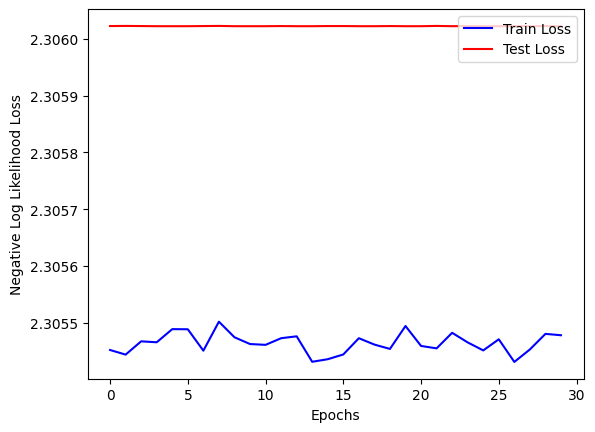

In [56]:
fig = plt.figure()
plt.plot(history_conv['train_loss'], color='blue')
plt.plot(history_conv['val_loss'], color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Negative Log Likelihood Loss')

### Visualizing Predictions of Conv Net

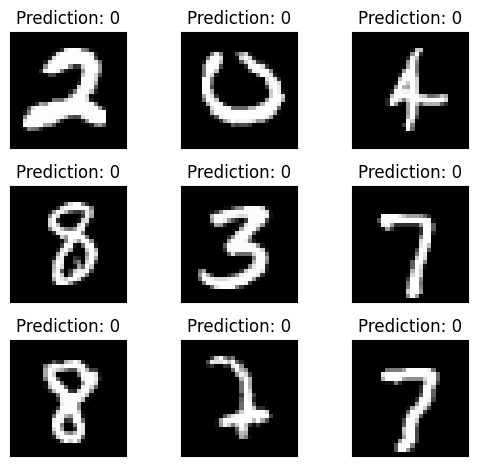

In [57]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
with torch.no_grad():
    example_data = example_data.to(device)
    output = conv_net(example_data)
example_data = example_data.cpu().detach().numpy()
fig = plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray',interpolation='none')
    plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])

# Training the Fully-Connected Neural Networks

<b>Exercise 3.1.6:</b> Train the fully connected neural network and analyse it

In [28]:
#TO-DO:Train the fc_net here
print('fc Net training started')
history_fc = {'train_loss':[],'val_loss':[]}
start_time = datetime.datetime.now()

for epoch in range(num_epochs):
    ### Training
    train_loss = train_model(
        model=fc_net,
        train_loader=train_loader,
        device=device,
        loss_fn=loss_fn,
        optimizer=optim_fc,
        input_dim=(-1,1,28,28))
    ### Validation  (use the testing function)
    val_loss = test_model(
        model=fc_net,
        test_loader=test_loader,
        device=device,
        loss_fn=loss_fn,
        input_dim=(-1,1,28,28))
    # Print Losses
    print(f'Epoch {epoch+1}/{num_epochs} : train loss {train_loss:.3f} \t val loss {val_loss:.3f}')
    history_fc['train_loss'].append(train_loss)
    history_fc['val_loss'].append(val_loss)


print(f'fc Net training done in {(datetime.datetime.now()-start_time).total_seconds():.3f} seconds!')

fc Net training started


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch 1/30 : train loss 0.480 	 val loss 0.213
Epoch 2/30 : train loss 0.181 	 val loss 0.150
Epoch 3/30 : train loss 0.131 	 val loss 0.122
Epoch 4/30 : train loss 0.101 	 val loss 0.106
Epoch 5/30 : train loss 0.080 	 val loss 0.110
Epoch 6/30 : train loss 0.065 	 val loss 0.093
Epoch 7/30 : train loss 0.052 	 val loss 0.081
Epoch 8/30 : train loss 0.044 	 val loss 0.080
Epoch 9/30 : train loss 0.037 	 val loss 0.086
Epoch 10/30 : train loss 0.031 	 val loss 0.080
Epoch 11/30 : train loss 0.026 	 val loss 0.101
Epoch 12/30 : train loss 0.025 	 val loss 0.093
Epoch 13/30 : train loss 0.019 	 val loss 0.084
Epoch 14/30 : train loss 0.014 	 val loss 0.085
Epoch 15/30 : train loss 0.016 	 val loss 0.137
Epoch 16/30 : train loss 0.017 	 val loss 0.087
Epoch 17/30 : train loss 0.011 	 val loss 0.101
Epoch 18/30 : train loss 0.009 	 val loss 0.095
Epoch 19/30 : train loss 0.010 	 val loss 0.102
Epoch 20/30 : train loss 0.007 	 val loss 0.093
Epoch 21/30 : train loss 0.005 	 val loss 0.099
E

## Visualizing Training Progress of FC Net (Check out your wandb.ai project webpage)

Text(0, 0.5, 'Negative Log Likelihood Loss')

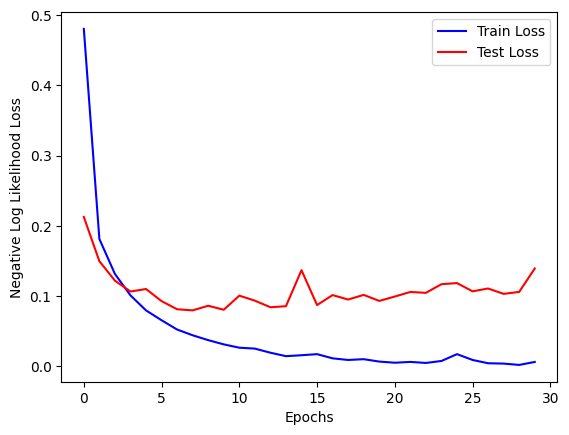

In [29]:
# TODO - Visualize the training progress of fc_net
fig = plt.figure()
plt.plot(history_fc['train_loss'], color='blue')
plt.plot(history_fc['val_loss'], color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Negative Log Likelihood Loss')

## Visualizing Predictions of FC Net

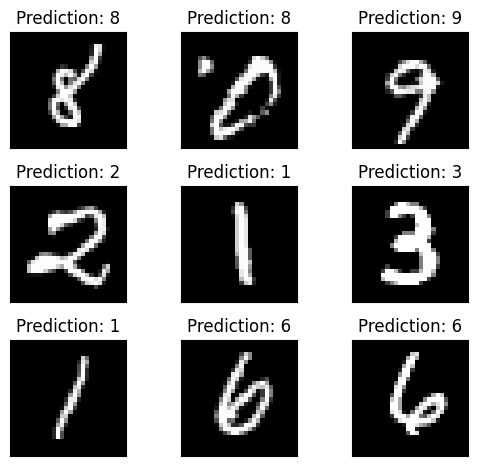

In [30]:
# TODO - Visualise the predictions of fc_net
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
with torch.no_grad():
    example_data = example_data.to(device)
    output = fc_net(example_data)
example_data = example_data.cpu().detach().numpy()
fig = plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray',interpolation='none')
    plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])

<b>Exercise 3.1.7</b>: What are the training times for each of the model? Did both the models take similar times? If yes, why? Shouldn't CNN train faster given it's number of weights to train?

In [ ]:
#Please type your answer here ...
"""
Conv_net traning time: 2158.184(s)
Fc_net training time: 869.595(s)
The reason that Conv_net took longer to train despite having a much smaller number of parameters is that
it does not use GPU for parallel computations. Therefore, it can take more time in the complex convolutional and maxpooling layers in Conv_net.
"""

## Let's see how the models perform under translation

In principle, one of the advantages of convolutions is that they are equivariant under translation which means that a function composed out of convolutions should invariant under translation.

<b>Exercise 3.1.8</b>: In practice, however, we might not see perfect invariance under translation.  What aspect of our network leads to imperfect invariance?

The accuracy of class tends to be low when the moved image is severely deviated compared to the original image or becomes similar to another class image.

We will next measure the sensitivity  of the convolutional network to translation in practice, and we will compare it to the fully-connected version.

In [32]:
## function to check accuracies for unit translation
def shiftVsAccuracy(model, test_loader, device, loss_fn, shifts = 12, input_dim=(-1,1,28,28)):
    # Set evaluation mode for encoder and decoder
    accuracies = []
    shifted = []
    for i in range(-shifts,shifts):
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad(): # No need to track the gradients
            # Define the lists to store the outputs for each batch
            predicted = []
            actual = []
            for images, labels in test_loader:
                # reshape input
                images = torch.roll(images,shifts=i, dims=2)
                if i == 0:
                    pass
                elif i > 0:
                    images[:,:,:i,:] = 0
                else:
                    images[:,:,i:,:] = 0
                images = torch.reshape(images,input_dim)
                images = images.to(device)
                labels = labels.to(device)
                ## predict the label
                pred = model(images)
                # Append the network output and the original image to the lists
                _ , pred = torch.max(pred.data, 1)
                total += labels.size(0)
                correct += (pred == labels).sum().item()
                predicted.append(pred.cpu())
                actual.append(labels.cpu())
            shifted.append(images[0][0].cpu())
            acc = 100 * correct // total
            accuracies.append(acc)
    return accuracies,shifted

In [33]:
accuracies,shifted = shiftVsAccuracy(
        model=conv_net,
        test_loader=test_loader,
        device=device,
        shifts=12,
        loss_fn=loss_fn,
        input_dim=(-1,1,28,28))

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Text(0.5, 1.0, 'Accuracy Vs Translation')

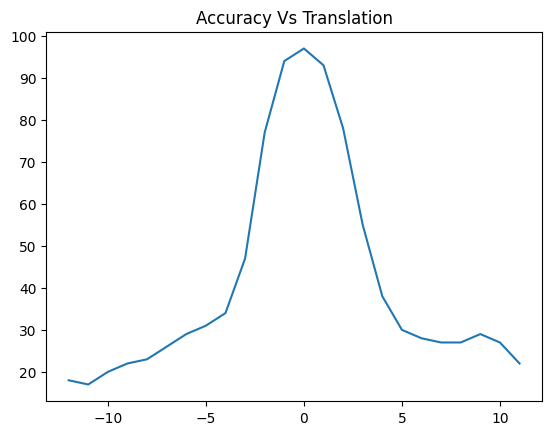

In [34]:
shifts = np.arange(-12,12)
plt.plot(shifts,accuracies)
plt.title('Accuracy Vs Translation')

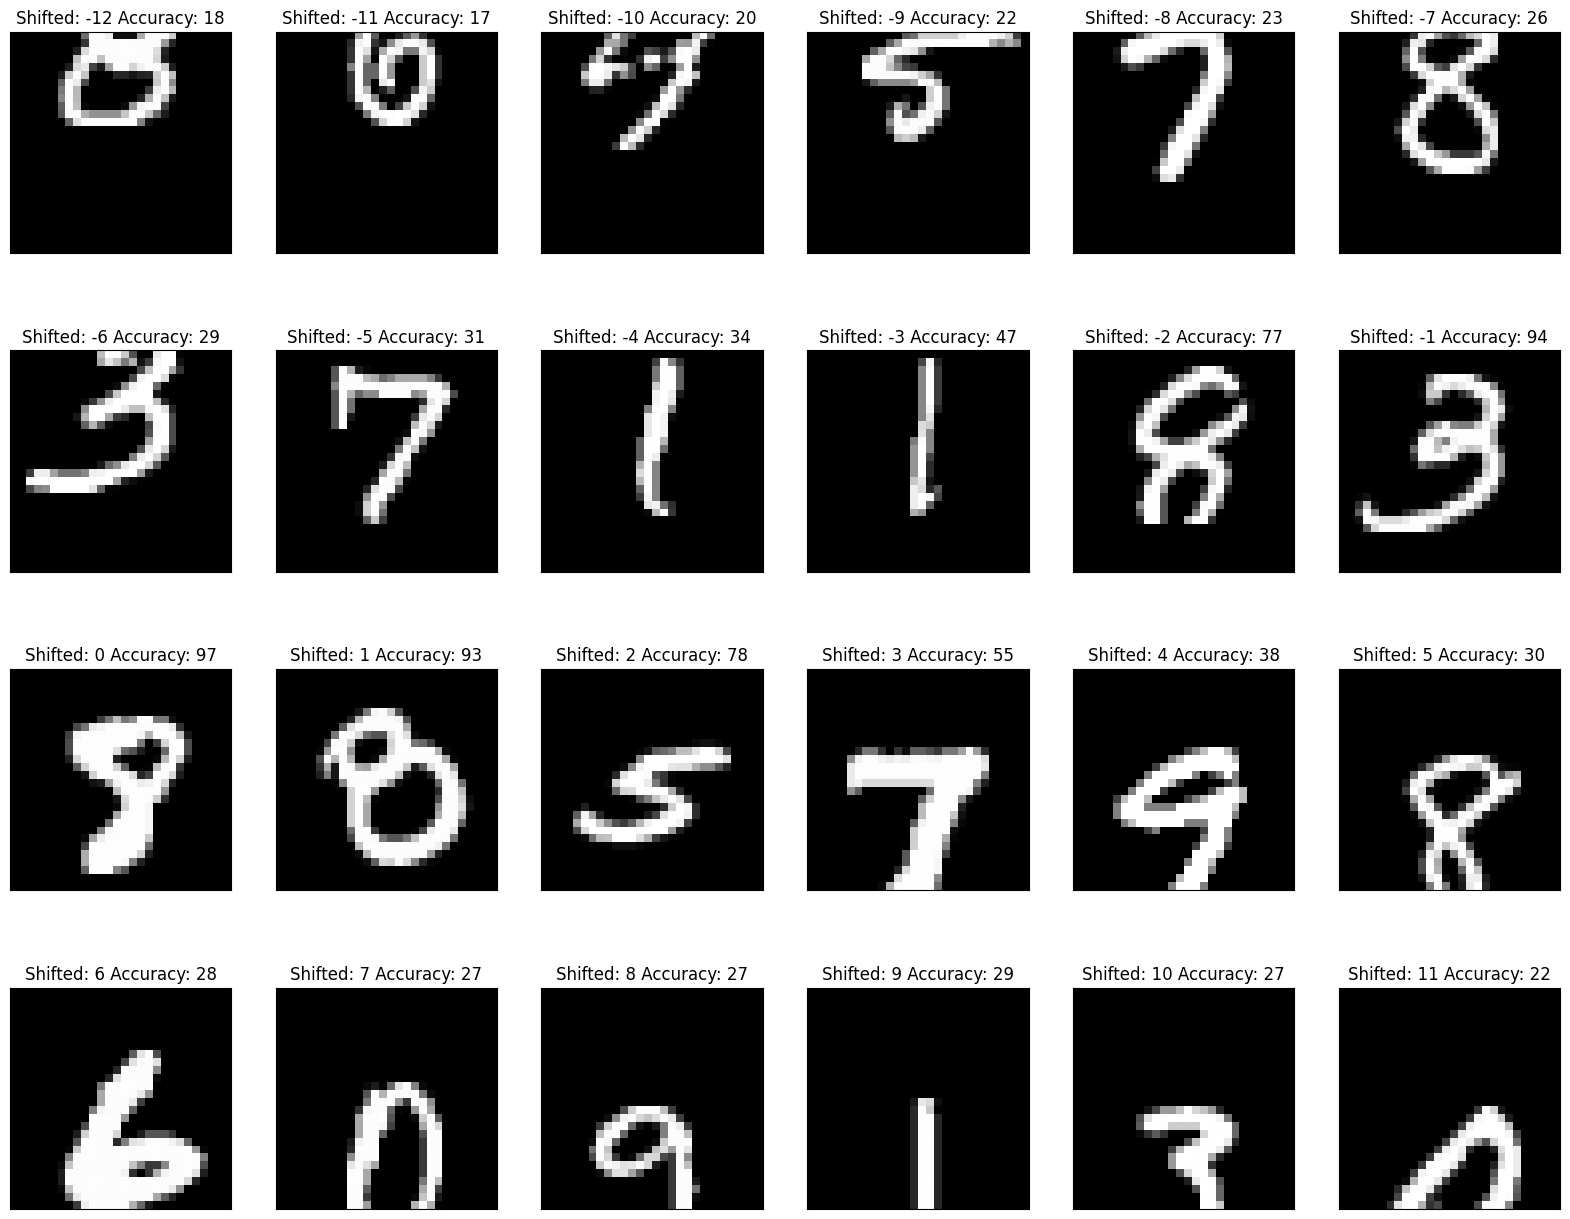

In [35]:
fig = plt.figure(figsize=(20,20))
plt_num = 0
for i in range(-12,12):
    plt.subplot(5,6,plt_num+1)
    plt.imshow(shifted[plt_num], cmap='gray',interpolation='none')
    plt.title(f"Shifted: {i} Accuracy: {accuracies[plt_num]}")
    plt.xticks([])
    plt.yticks([])
    plt_num+=1

<b>Exercise 3.1.8:</b>
Do the same for FC-Net and plot the accuracies. Is the rate of accuracy degradation same as Conv-Net? Can you justify why this happened? <br>
Clue: You might want to look at the way convolution layers process information

The result between Conv_net and Fc_net is similar. The reason for this is that whether using a filter to extract image features or extracting the whole image, the weights for the distorted image are not significantly different in the end.

In [36]:
# To-DO Write your code below
accuracies,shifted = shiftVsAccuracy(
        model=fc_net,
        test_loader=test_loader,
        device=device,
        shifts=12,
        loss_fn=loss_fn,
        input_dim=(-1,1,28,28))

Text(0.5, 1.0, 'Accuracy Vs Translation')

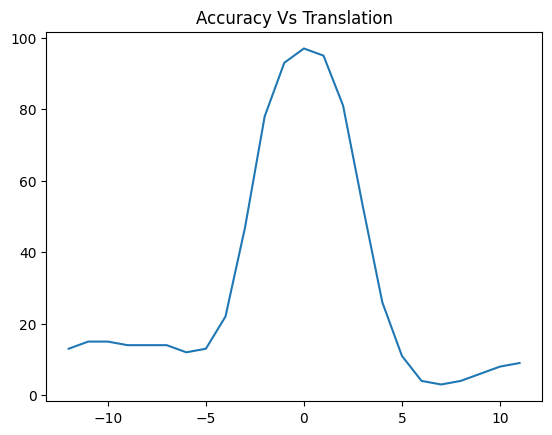

In [37]:
shifts = np.arange(-12,12)
plt.plot(shifts,accuracies)
plt.title('Accuracy Vs Translation')

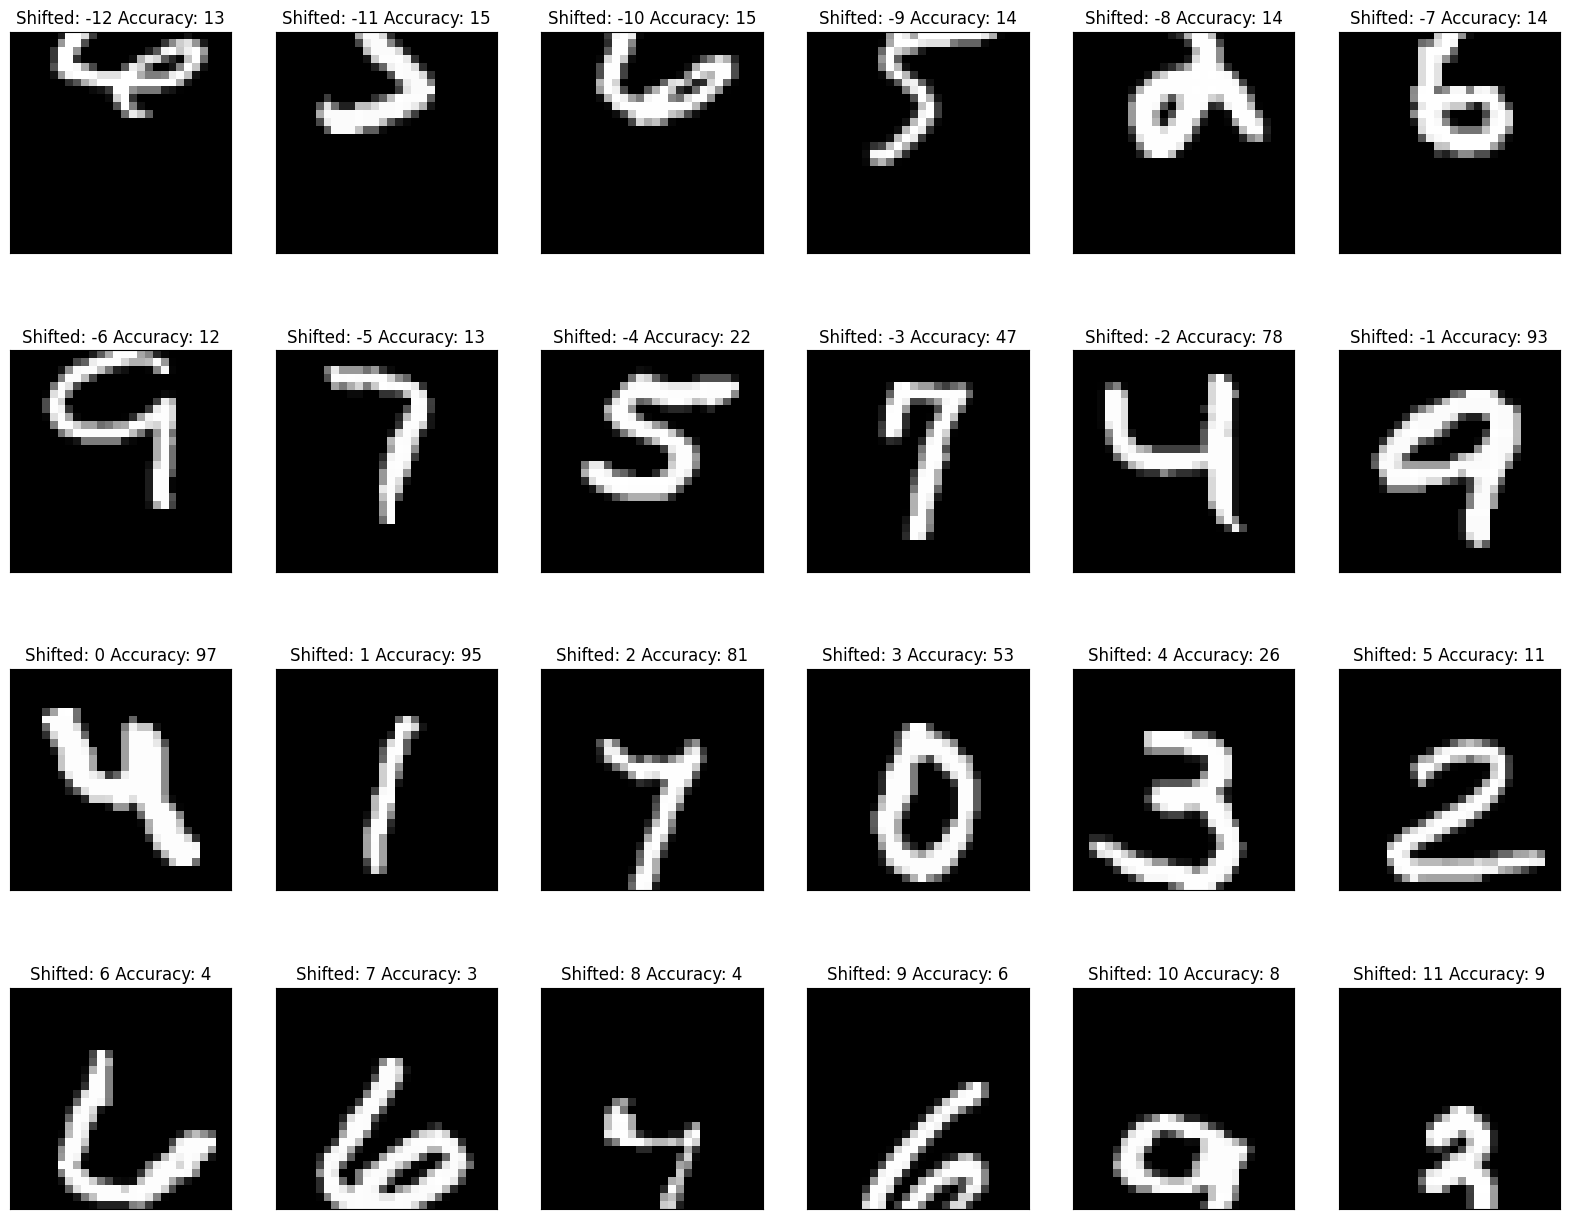

In [38]:
fig = plt.figure(figsize=(20,20))
plt_num = 0
for i in range(-12,12):
    plt.subplot(5,6,plt_num+1)
    plt.imshow(shifted[plt_num], cmap='gray',interpolation='none')
    plt.title(f"Shifted: {i} Accuracy: {accuracies[plt_num]}")
    plt.xticks([])
    plt.yticks([])
    plt_num+=1